# Data Transformation / Profiling
### - weekly_profile_detection

The function takes as input a time-indexed series of a measurement of instantaneous type and derives the weekly pattern from the data. Holidays are provided as an input time series or a list of days to the function and are excluded from the calculation, together with outliers. To be consistent with the input data, the resulting time series will be temporarily aligned with the last week of the input series. The function uses data_preparation.detect_time_step to infer the frequency of the input data and convert it to hourly data with data_preparation.align_time_grid. The minimum frequency allowed to compute the weekly profile is hourly ('H').

### - yearly_profile_detection

The function takes as input a time-indexed series of a measurement of instantaneous type and derives the yearly pattern from the data. Holidays are provided as an input time series or a list of days to the function and are excluded from the calculation, together with outliers. To be consistent with the input data, the resulting time series will be temporarily aligned with the last year of the input series. The function uses data_preparation.detect_time_step to infer the frequency of the input data and convert it to daily data with data_preparation.align_time_grid. The lowest frequency allowed to be able to compute the weekly profile is daily ('D').

In [21]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
from os import getcwd
from os.path import join

from ai_toolbox.data_transformation import weekly_profile_detection, yearly_profile_detection

In [22]:
# Get filename of the dataset we will use (it is in biggpy/ai_toolbox/notebooks/datasets)
# It should be located automatically if you don't move the notebook file to another location


internal_temp_filename = join(getcwd(), "datasets", "internal_temperature_data.csv")

In [23]:
# This should be the path of the file internal_temperature_data.csv (in biggpy/ai_toolbox/notebooks/datasets) in your system
internal_temp_filename

'/home/rick/Coding/Notebooks/datasets/internal_temperature_data.csv'

In [24]:
# Import internal temperature data at 15-minute granularity (irregular)

df = pd.read_csv(
    internal_temp_filename,
    sep=',',
    parse_dates=True,
    infer_datetime_format=True,
    index_col=0)
df.index.name = "timestamp"
df

,internal_temperature.actual
timestamp,
2019-03-15 15:00:00+00:00,22.7
2019-03-15 15:15:00+00:00,22.7
2019-03-15 15:45:00+00:00,22.7
2019-03-15 16:00:00+00:00,22.7
2019-03-15 16:15:00+00:00,22.7
...,...
2021-11-14 20:15:00+00:00,17.0
2021-11-14 21:00:00+00:00,17.0
2021-11-14 21:30:00+00:00,17.0


In [25]:
# Compute weekly profile

weekly_profile = weekly_profile_detection(df)
weekly_profile

,internal_temperature.actual
timestamp,
2021-11-08 00:00:00+00:00,20.5
2021-11-08 01:00:00+00:00,20.6
2021-11-08 02:00:00+00:00,20.4
2021-11-08 03:00:00+00:00,20.5
2021-11-08 04:00:00+00:00,20.5
...,...
2021-11-14 19:00:00+00:00,20.8
2021-11-14 20:00:00+00:00,20.8
2021-11-14 21:00:00+00:00,20.6


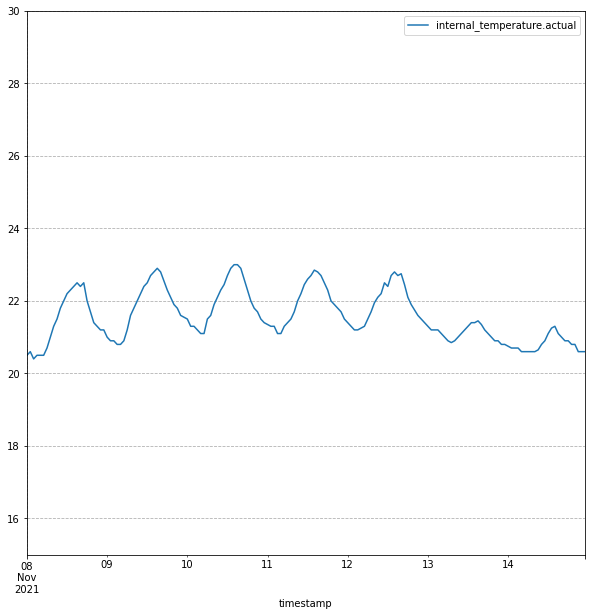

In [26]:
# Plot weekly profile (aligned on the last week of the data)

weekly_profile.plot(ylim=(15, 30), figsize=(10, 10)).grid(which='major', axis='both', linestyle='--')
plt.show()

In [27]:
# Do the same with the yearly profile (aligned on the last year of data)

yearly_profile = yearly_profile_detection(df)
yearly_profile

,internal_temperature.actual
timestamp,
2021-01-01 00:00:00+00:00,18.2
2021-01-02 00:00:00+00:00,17.7
2021-01-03 00:00:00+00:00,19.0
2021-01-04 00:00:00+00:00,18.8
2021-01-05 00:00:00+00:00,18.7
...,...
2021-12-27 00:00:00+00:00,18.6
2021-12-28 00:00:00+00:00,18.6
2021-12-29 00:00:00+00:00,18.7


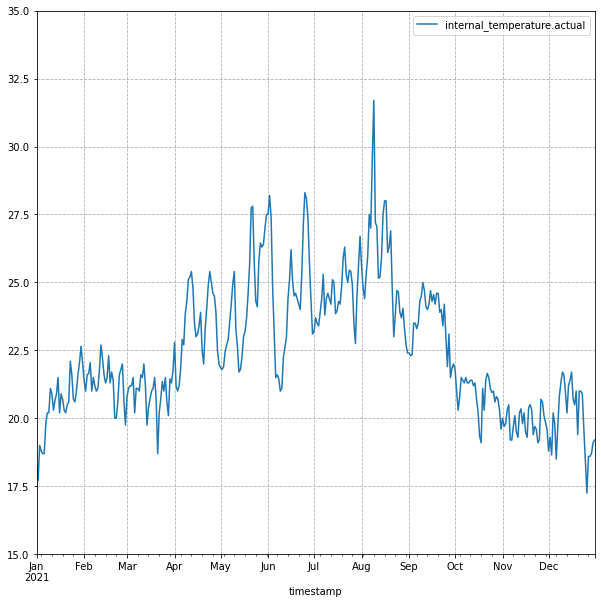

In [28]:
yearly_profile.plot(ylim=(15, 35), figsize=(10, 10)).grid(which='major', axis='both', linestyle='--')
plt.show()

In [29]:
# Let's recompute the weekly and yearly profile but with all the weekends excluded

# Generate boolean series of days to exclude (True in the weekends => exclude weekends)

idx = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')
exclude = pd.Series(index=idx, data=idx.dayofweek > 4)
exclude

2019-03-15 15:00:00+00:00    False
2019-03-16 15:00:00+00:00     True
2019-03-17 15:00:00+00:00     True
2019-03-18 15:00:00+00:00    False
2019-03-19 15:00:00+00:00    False
                             ...  
2021-11-10 15:00:00+00:00    False
2021-11-11 15:00:00+00:00    False
2021-11-12 15:00:00+00:00    False
2021-11-13 15:00:00+00:00     True
2021-11-14 15:00:00+00:00     True
Freq: D, Length: 976, dtype: bool

In [30]:
weekly_profile_without_weekends = weekly_profile_detection(data=df, exclude_days=exclude)
weekly_profile_without_weekends


,internal_temperature.actual
timestamp,
2021-11-08 00:00:00+00:00,20.50
2021-11-08 01:00:00+00:00,20.60
2021-11-08 02:00:00+00:00,20.40
2021-11-08 03:00:00+00:00,20.50
2021-11-08 04:00:00+00:00,20.50
...,...
2021-11-12 19:00:00+00:00,21.90
2021-11-12 20:00:00+00:00,21.75
2021-11-12 21:00:00+00:00,21.60


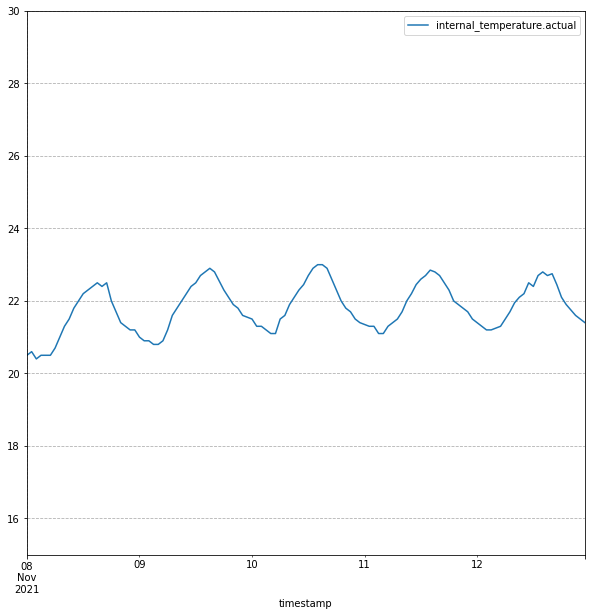

In [31]:
# Plot weekly profile (aligned on the last week of the data)

weekly_profile_without_weekends.plot(ylim=(15, 30), figsize=(10, 10)).grid(which='major', axis='both', linestyle='--')
plt.show()

In [32]:
# Another example, let's recompute the yearly profile without the month of August

# Generate boolean series of days to exclude (True in August => exclude August)

idx = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')
exclude = pd.Series(index=idx, data=idx.month == 8)
exclude[idx.month==8]

2019-08-01 15:00:00+00:00    True
2019-08-02 15:00:00+00:00    True
2019-08-03 15:00:00+00:00    True
2019-08-04 15:00:00+00:00    True
2019-08-05 15:00:00+00:00    True
                             ... 
2021-08-27 15:00:00+00:00    True
2021-08-28 15:00:00+00:00    True
2021-08-29 15:00:00+00:00    True
2021-08-30 15:00:00+00:00    True
2021-08-31 15:00:00+00:00    True
Length: 93, dtype: bool

In [33]:
yearly_profile_without_weekends = yearly_profile_detection(df, exclude_days=exclude)
yearly_profile

,internal_temperature.actual
timestamp,
2021-01-01 00:00:00+00:00,18.2
2021-01-02 00:00:00+00:00,17.7
2021-01-03 00:00:00+00:00,19.0
2021-01-04 00:00:00+00:00,18.8
2021-01-05 00:00:00+00:00,18.7
...,...
2021-12-27 00:00:00+00:00,18.6
2021-12-28 00:00:00+00:00,18.6
2021-12-29 00:00:00+00:00,18.7


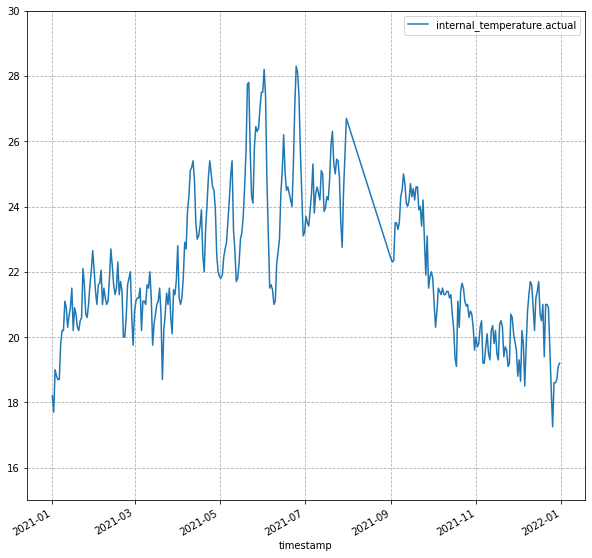

In [34]:
# Plot yearly profile (aligned on the last year of the data) without August

yearly_profile_without_weekends.plot(ylim=(15, 30), figsize=(10, 10)).grid(which='major', axis='both', linestyle='--')
plt.show()